## EDA

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
df=pd.read_csv(r"C:\Users\akshaya_gv\Desktop\Capstone\bank+marketing\bank\bank-full.csv",sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.contact.value_counts() #13k unknown values

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [8]:
df.poutcome.value_counts() #36k unknown

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [9]:
df.job.value_counts() #288 unknown 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [10]:
df.education.value_counts() #1857 unknown

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


* Most of the people in data fall under the ages 20-40
* Highest observed balance is 1,02,127. Most balance amount falls between 1-448. There are some negative values in the column could mean client has no balance and is using money from the bank.
* The clients are contacted the most around the day 20.
* On an average the duration of the calls exists for 258 seconds. There are some calls with 0 second duration and those clients may have been contacted for multiple times.
* For the telemarketing campaign, normally a client would be contacted 2 times. The highest number of conatacts (campaign) that ever made was 63 times.
* pdays represent the number of days passed after the contact with the client for the previous campaign. Most of the clients were never been contacted for the previous campaign.
* pdays affect previous. A single was contacted for 275 times in the previous campaign.

In [12]:
df[df['previous']==275]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,no


In [13]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [14]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

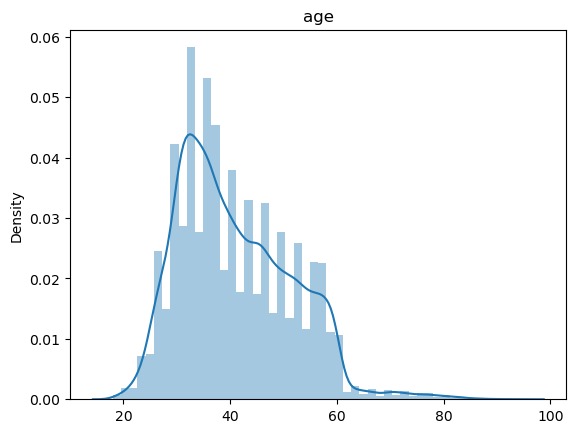

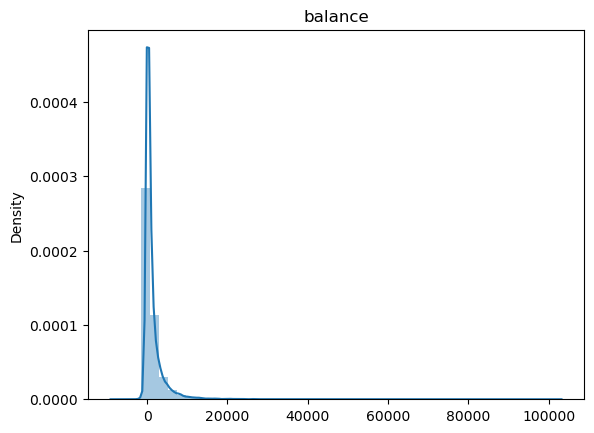

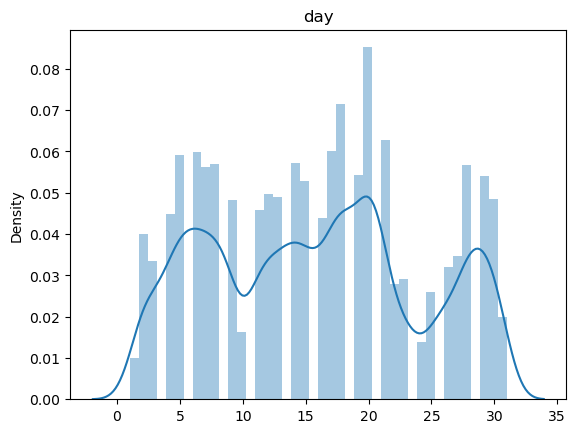

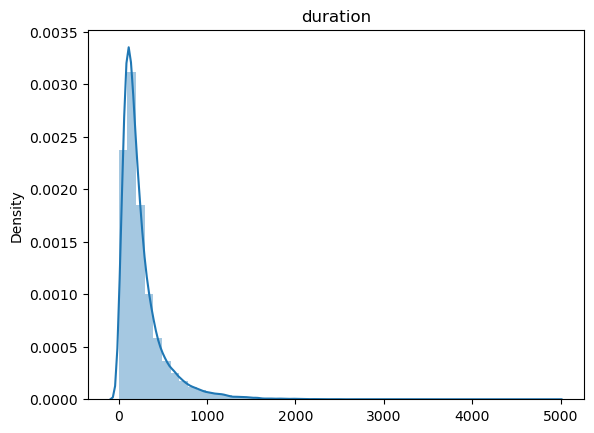

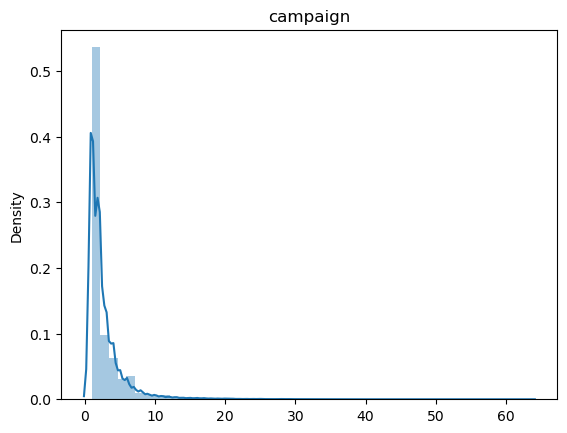

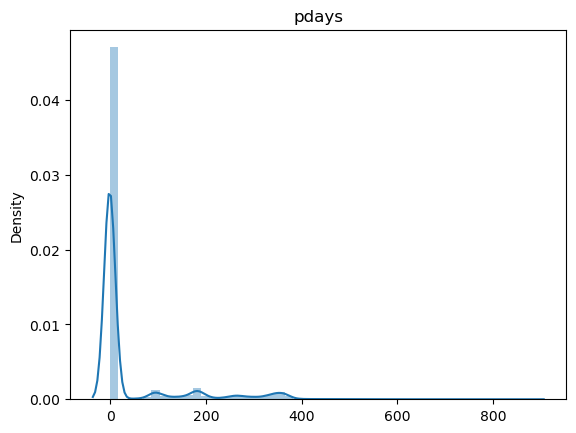

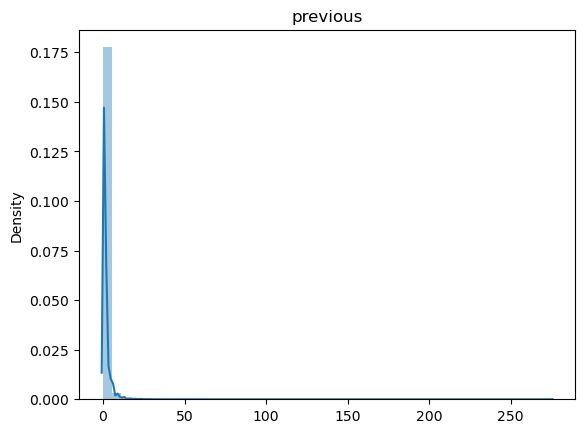

In [15]:
for i in df.select_dtypes(np.number).columns:
    sns.distplot(x=df[i])
    plt.title(i)
    plt.show()

In [16]:
df.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

* Day is normally distributed
* Other variables are right skewed

<AxesSubplot:ylabel='marital'>

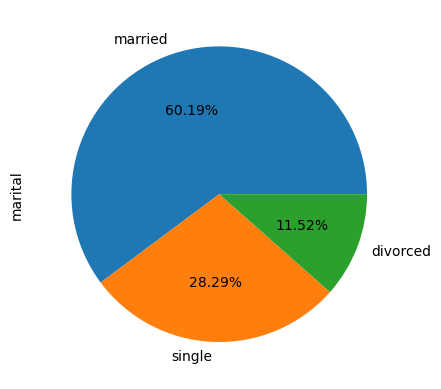

In [17]:
df['marital'].value_counts().plot(kind='pie',autopct='%.2f%%')

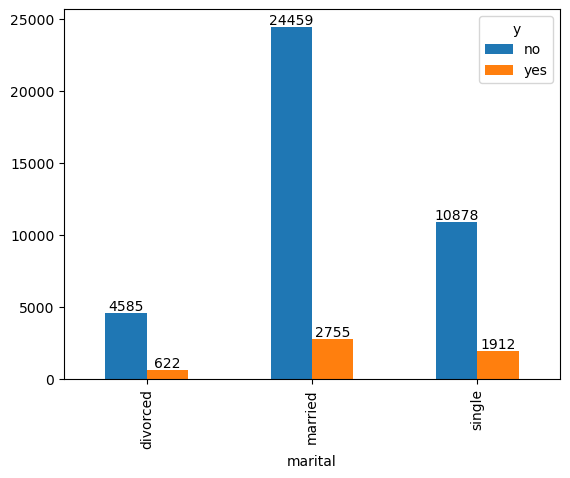

In [24]:
m=pd.crosstab(df['marital'],df['y']).plot(kind='bar')
for i in m.containers:
    m.bar_label(i)

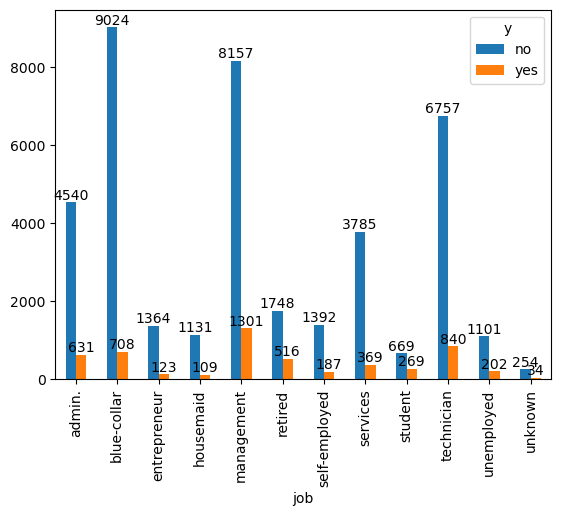

In [18]:
m=pd.crosstab(df['job'],df['y']).plot(kind='bar')
for i in m.containers:
    m.bar_label(i)

<AxesSubplot:xlabel='y', ylabel='count'>

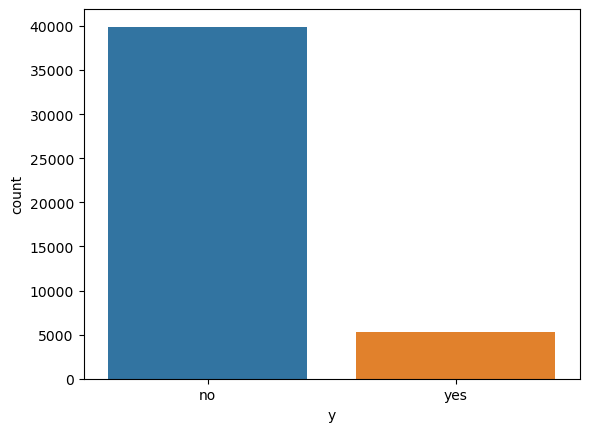

In [25]:
sns.countplot(df['y'])

In [76]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

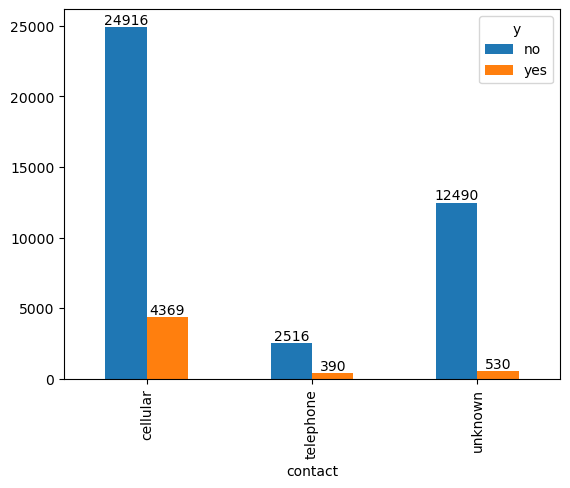

In [28]:
d=pd.crosstab(df['contact'],df['y']).plot(kind='bar')
for i in d.containers:
    d.bar_label(i)

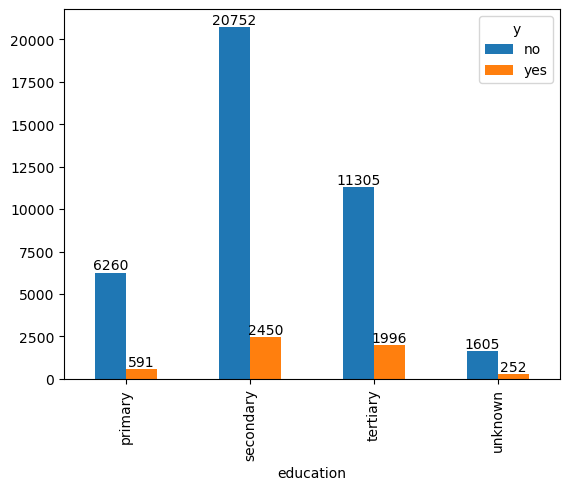

In [30]:
c=pd.crosstab(df['education'],df['y']).plot(kind='bar')
for i in c.containers:
    c.bar_label(i)

<AxesSubplot:xlabel='job'>

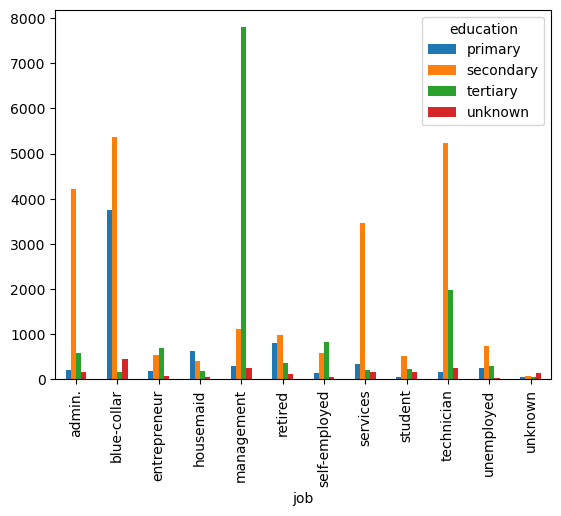

In [31]:
pd.crosstab(df['job'],df['education']).plot(kind='bar')

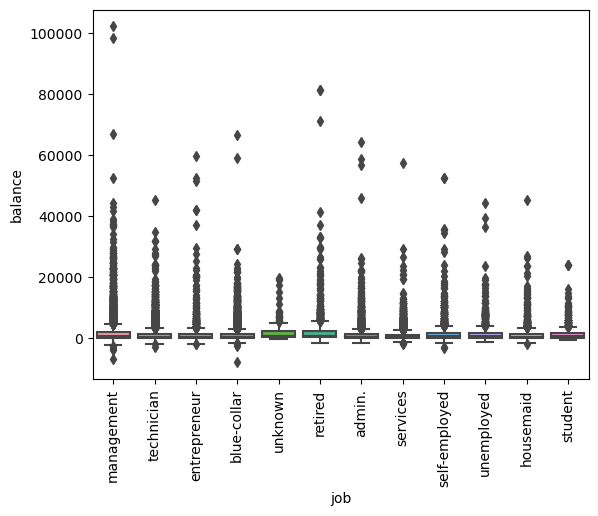

In [75]:
sns.boxplot(x=df['job'],y=df['balance'])
plt.xticks(rotation=90)
plt.show()

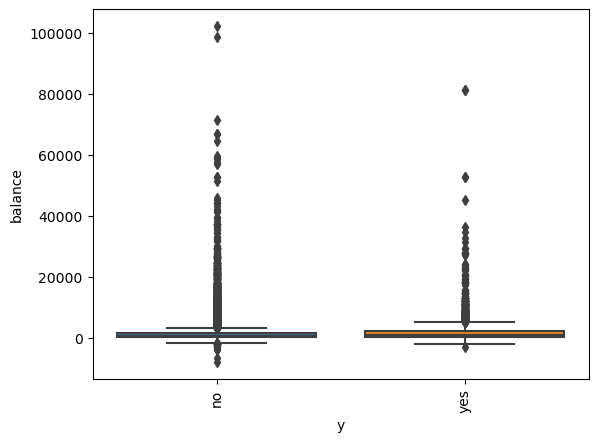

In [78]:
sns.boxplot(x=df['y'],y=df['balance'])
plt.xticks(rotation=90)
plt.show()

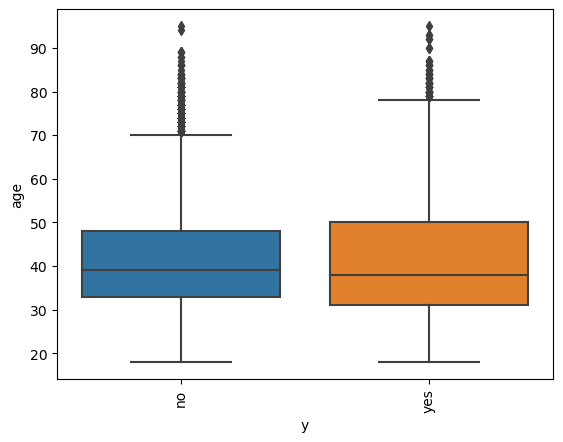

In [80]:
sns.boxplot(x=df['y'],y=df['age'])
plt.xticks(rotation=90)
plt.show()

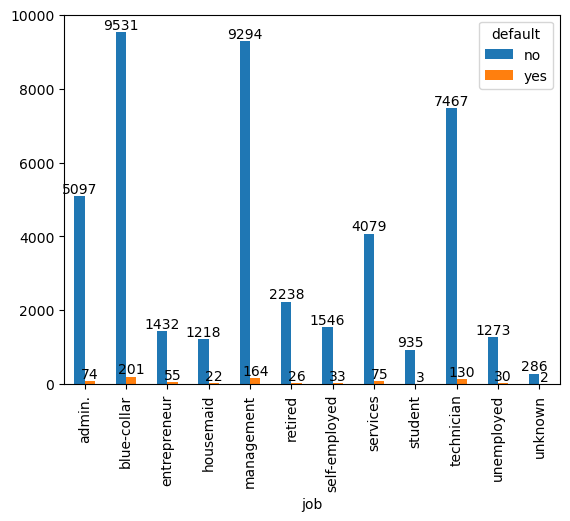

In [33]:
ax=pd.crosstab(df['job'],df['default']).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

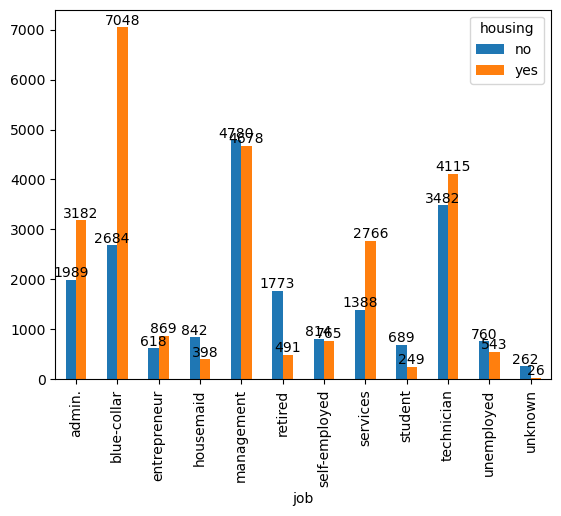

In [34]:
x=pd.crosstab(df['job'],df['housing']).plot(kind='bar')
for i in x.containers:
    x.bar_label(i)

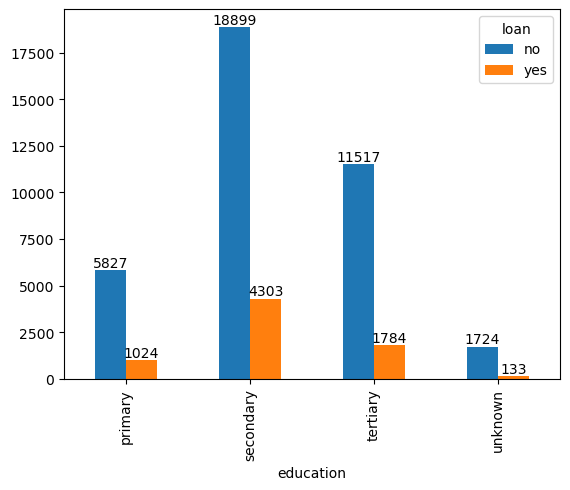

In [35]:
c=pd.crosstab(df['education'],df['loan']).plot(kind='bar')
for i in c.containers:
    c.bar_label(i)

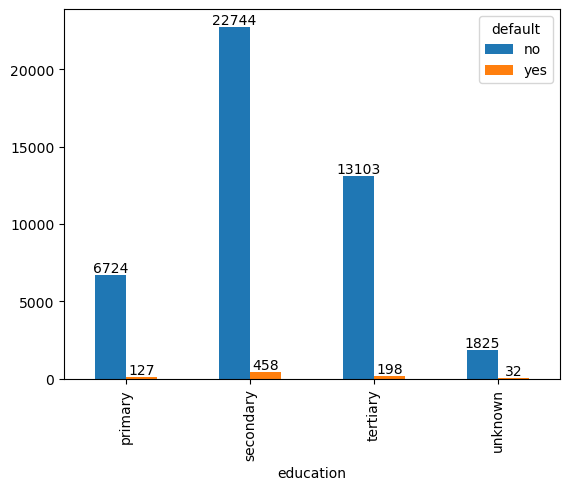

In [36]:
c=pd.crosstab(df['education'],df['default']).plot(kind='bar')
for i in c.containers:
    c.bar_label(i)

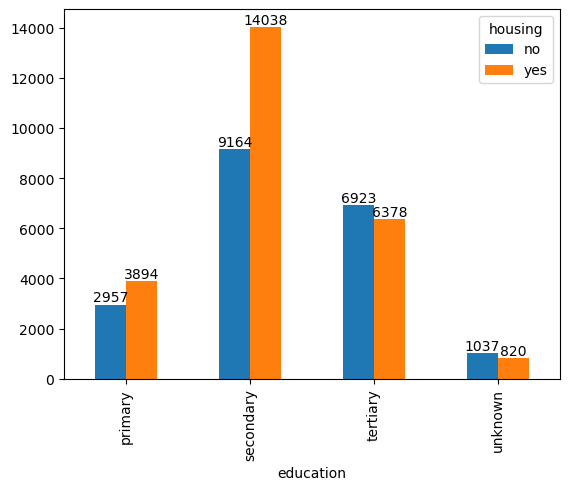

In [37]:
c=pd.crosstab(df['education'],df['housing']).plot(kind='bar')
for i in c.containers:
    c.bar_label(i)

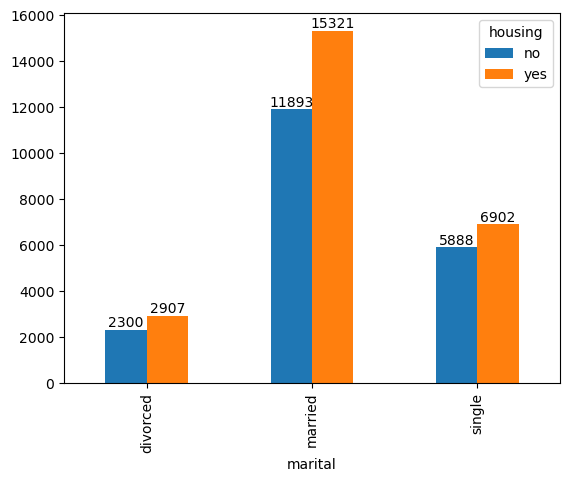

In [38]:
c=pd.crosstab(df['marital'],df['housing']).plot(kind='bar')
for i in c.containers:
    c.bar_label(i)

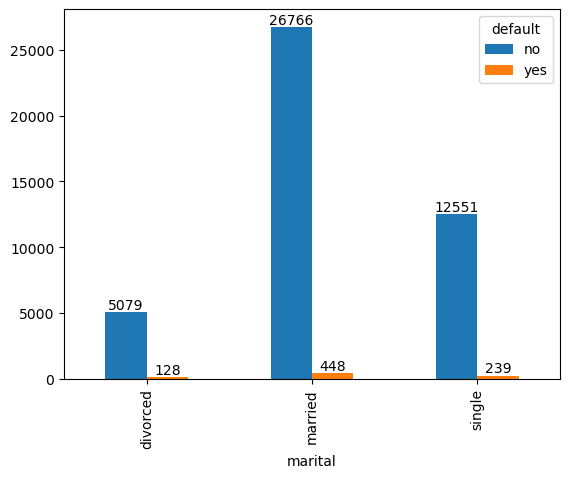

In [39]:
c=pd.crosstab(df['marital'],df['default']).plot(kind='bar')
for i in c.containers:
    c.bar_label(i)

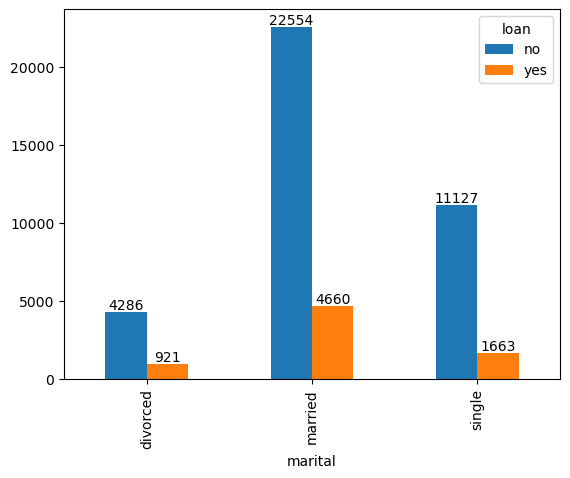

In [40]:
c=pd.crosstab(df['marital'],df['loan']).plot(kind='bar')
for i in c.containers:
    c.bar_label(i)

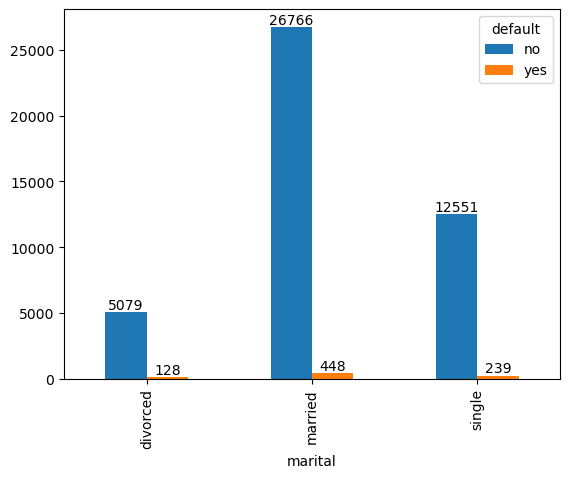

In [41]:
c=pd.crosstab(df['marital'],df['default']).plot(kind='bar')
for i in c.containers:
    c.bar_label(i)

In [42]:
yes=df[df['y']=='yes']

<AxesSubplot:ylabel='Density'>

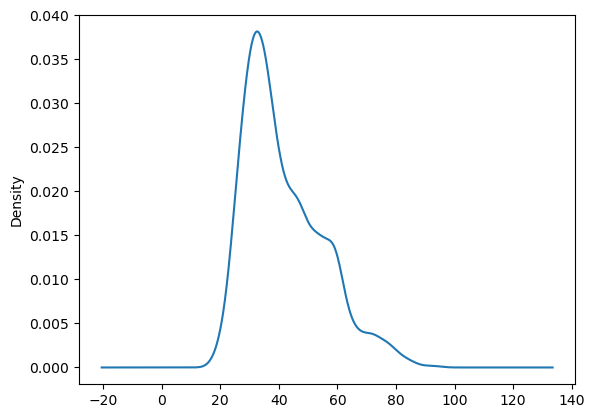

In [43]:
yes['age'].plot(kind='kde')

In [44]:
yes['age'].unique()

array([59, 56, 41, 55, 54, 42, 60, 39, 37, 34, 28, 30, 36, 45, 53, 38, 29,
       46, 31, 35, 32, 49, 43, 26, 40, 33, 24, 23, 48, 52, 57, 51, 44, 50,
       27, 47, 25, 58, 61, 62, 68, 75, 22, 69, 64, 66, 85, 72, 90, 67, 71,
       21, 63, 73, 74, 65, 83, 79, 70, 76, 77, 19, 20, 78, 95, 82, 18, 86,
       84, 87, 92, 81, 80, 93], dtype=int64)

<AxesSubplot:ylabel='Density'>

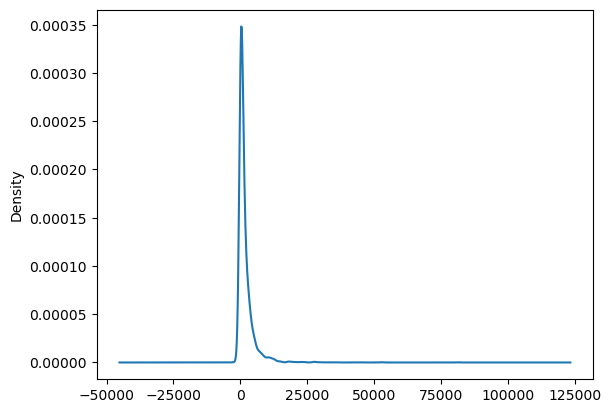

In [45]:
yes['balance'].plot(kind='kde')

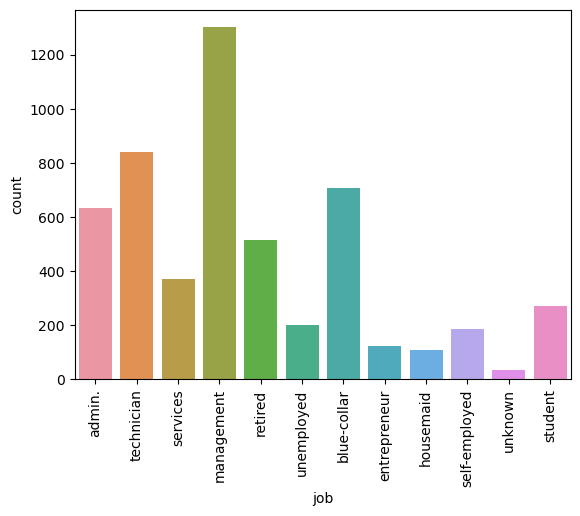

In [47]:
sns.countplot(yes['job'])
plt.xticks(rotation=90)
plt.show()

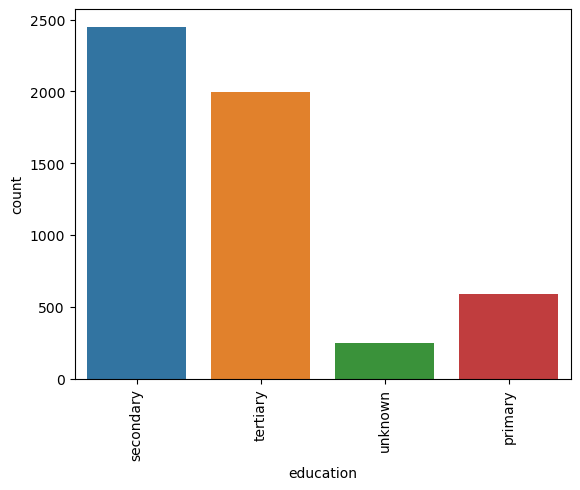

In [48]:
sns.countplot(yes['education'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='default', ylabel='count'>

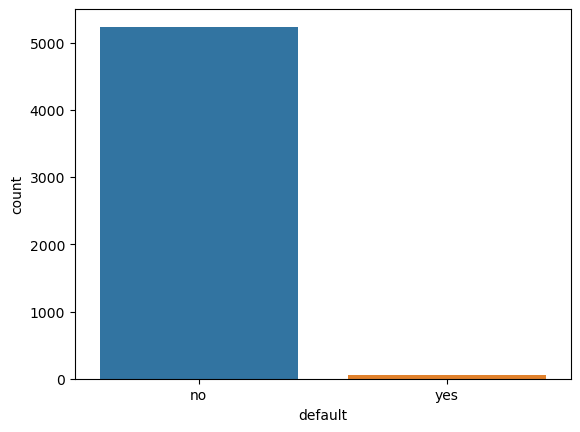

In [49]:
sns.countplot(yes['default'])

<AxesSubplot:xlabel='housing', ylabel='count'>

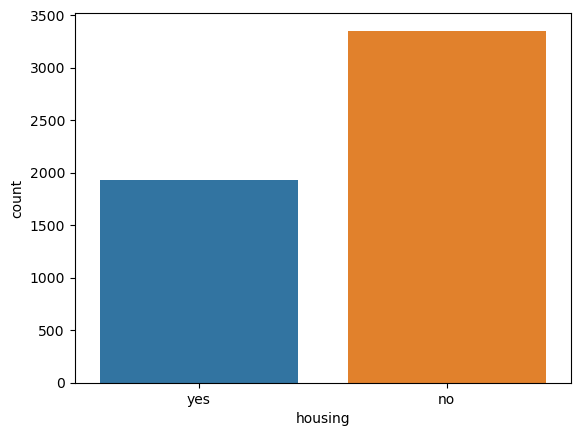

In [50]:
sns.countplot(yes['housing'])

<AxesSubplot:xlabel='loan', ylabel='count'>

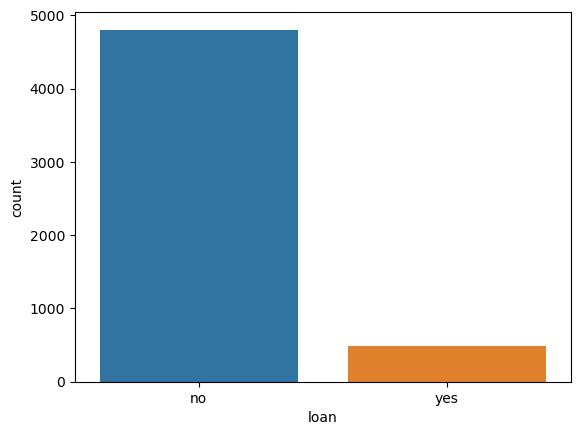

In [51]:
sns.countplot(yes['loan'])

In [52]:
yes['age'].unique()

array([59, 56, 41, 55, 54, 42, 60, 39, 37, 34, 28, 30, 36, 45, 53, 38, 29,
       46, 31, 35, 32, 49, 43, 26, 40, 33, 24, 23, 48, 52, 57, 51, 44, 50,
       27, 47, 25, 58, 61, 62, 68, 75, 22, 69, 64, 66, 85, 72, 90, 67, 71,
       21, 63, 73, 74, 65, 83, 79, 70, 76, 77, 19, 20, 78, 95, 82, 18, 86,
       84, 87, 92, 81, 80, 93], dtype=int64)

In [58]:
yes['age'].min()

18

In [59]:
yes['age'].max()

95

In [53]:
yes['balance'].unique()

array([2343,   45, 1270, ..., 3810, 1511, 1729], dtype=int64)

In [54]:
yes['balance'].min()

-3058

In [55]:
yes['balance'].max()

81204

In [56]:
df['balance'].min()

-8019

In [57]:
df['balance'].max()

102127

<AxesSubplot:xlabel='y', ylabel='duration'>

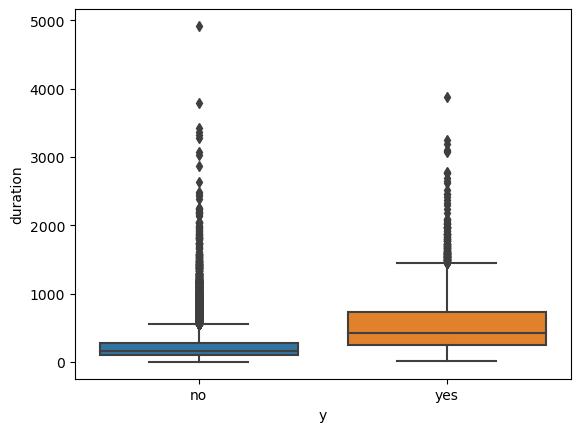

In [74]:
sns.boxplot(x=df['y'],y=df['duration'])

In [61]:
yes.duration.max()

3881

In [62]:
yes.duration.min()

8

<AxesSubplot:xlabel='campaign', ylabel='duration'>

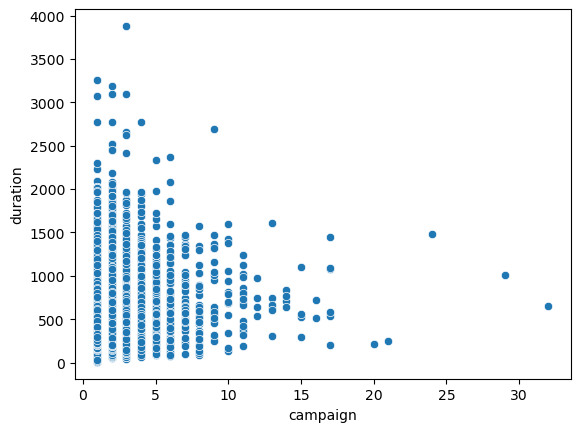

In [66]:
sns.scatterplot(y=yes['duration'],x=yes['campaign'])

<AxesSubplot:xlabel='pdays', ylabel='previous'>

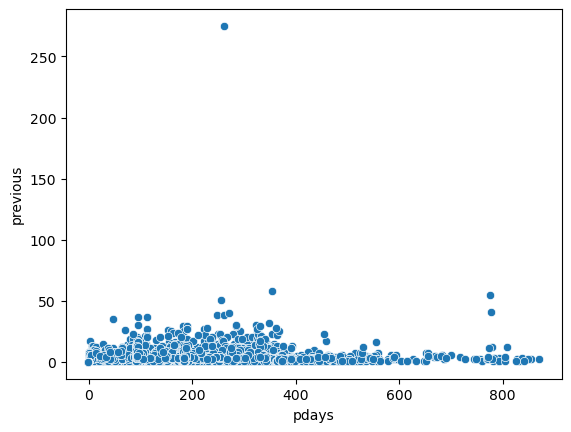

In [67]:
sns.scatterplot(x=df['pdays'],y=df['previous'])

<AxesSubplot:xlabel='poutcome', ylabel='pdays'>

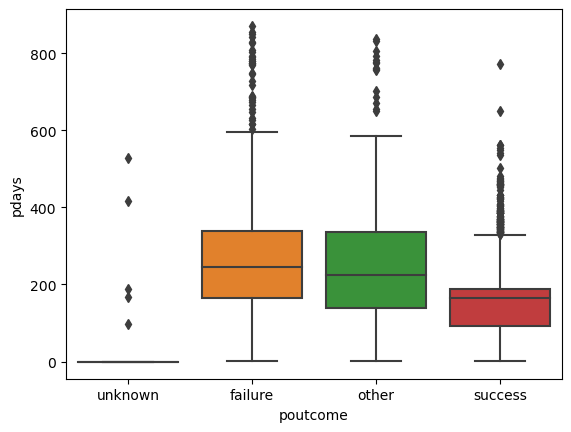

In [73]:
sns.boxplot(x=df['poutcome'],y=df['pdays'])

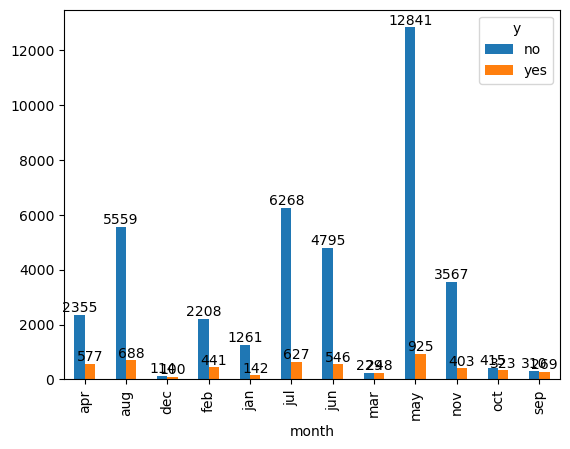

In [69]:
c=pd.crosstab(df['month'],df['y']).plot(kind='bar')
for i in c.containers:
    c.bar_label(i)

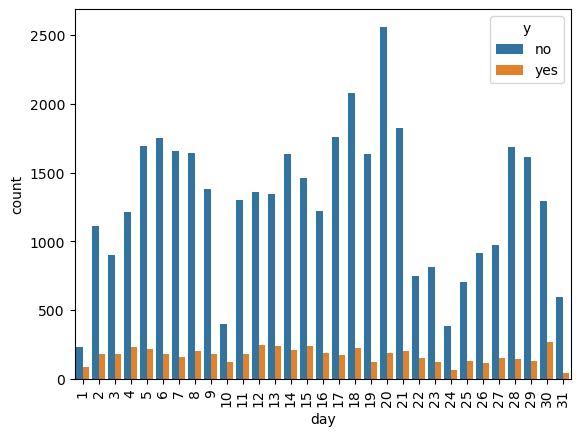

In [71]:
sns.countplot(df['day'],hue=df['y'])
plt.xticks(rotation=90)
plt.show()

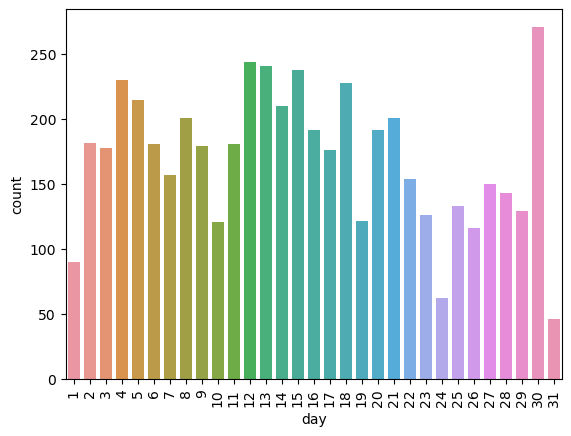

In [77]:
sns.countplot(yes['day'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

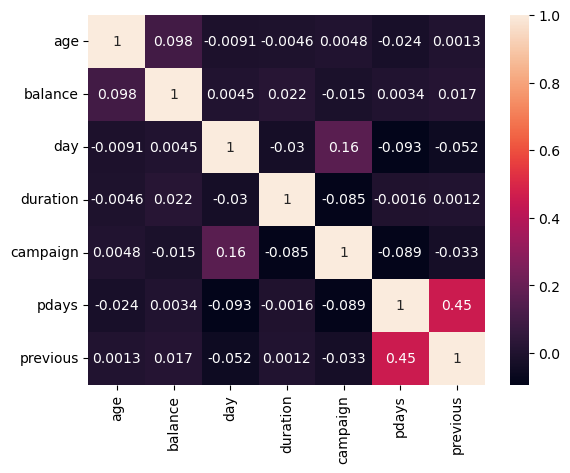

In [72]:
sns.heatmap(df.corr(),annot=True) 

# weak correlations are observed between pdays-previous and campaign-day

* The target variable is imbalanced. yes(5289):no(39922).
* The clients who are default are less in number.
* More married people have subscribed to the term subscription than other marital groups.
* Cellular mode of contact has resulted in high number of subscriptions.
* Clients in management job have made higher number of subscriptions than others.
* Blue collar clients are high in number for taking the housing loans.
* Common behaviour observed in clients who have subscribed to the term deposit are less defaults, personal loans and housing loans.
* Married clients have taken more housing loans.
* Many contacts are made in May month. The subscription number in May is highest.
* 30th day has the highest number of subscriptions.
* Management clients have higher balance, followed by retired clients.

### Business Interpretation
* Clients with higher average yearly balance can be targeted for the marketing.
* Clients with no loans or any one of the loans and no defaulters can also be the potential clients for subscriptions.
* Attractive interest rates should be fixed in order to get more clients for the subscription.